In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

# Build the vocabullary and mappring between characters and ids
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars, start=1)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
block_size = 3

In [3]:
len(words)

32033

## starting 

In [49]:
X, Y = [], []

for w in words:
    # print(w)
    context = [0] * block_size
    
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '----->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)


In [50]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [7]:
C = torch.randn((27, 2))

In [8]:
C[5]

tensor([ 2.3107, -1.2474])

In [9]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [10]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [11]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
h.shape

torch.Size([32, 100])

In [12]:
# emb.view(32, 6) == torch.cat(torch.unbind(emb, 1), dim=1)
# torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], dim=1)[4]
# torch.cat(torch.unbind(emb, 1), dim=1)

In [13]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [14]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [15]:
counts = logits.exp()

In [16]:
prob = counts / counts.sum(1, keepdim=True)

In [17]:
prob.shape

torch.Size([32, 27])

In [18]:
prob[0].sum()

tensor(1.0000)

In [27]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(15.5603)

In [53]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [52]:
sum(p.nelement() for p in parameters)

3481

In [240]:
g = torch.Generator().manual_seed(2147383647)
C = torch.randn([27, 2], generator=g)

W1 = torch.randn([6, 100], generator=g)
b1 = torch.randn(100, generator=g)

W2 = torch.randn([100, 27], generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [241]:
for p in parameters:
    p.requires_grad = True

In [242]:
lre = torch.linspace(-3, 0, steps=1000)
lrs = 10**lre

In [243]:
lri = []
lossi = []

for i in range(1000):
    # minibatch creation
    batch_ix = torch.randint(0, X.shape[0], size=(32,))
    
    # forward pass
    emb = C[X[batch_ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[batch_ix])
    print(loss.item())
    
    # backwardpass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    lr = lrs[i]
    # updating parameters
    for p in parameters:
        p.data += -lr * p.grad
    
    lri.append(lre[i])
    lossi.append(loss.item())

20.303482055664062
20.06126594543457
20.749195098876953
18.408296585083008
20.414386749267578
20.892736434936523
21.14334487915039
19.53945541381836
16.735998153686523
20.138452529907227
19.458826065063477
20.19416618347168
18.266006469726562
21.942840576171875
18.1596622467041
21.060928344726562
18.000648498535156
17.077775955200195
19.662067413330078
21.525131225585938
18.204782485961914
21.940309524536133
16.63617515563965
20.83652687072754
20.715837478637695
17.237504959106445
20.366580963134766
16.92737579345703
20.912010192871094
17.567907333374023
18.835607528686523
17.85584259033203
20.768115997314453
17.326265335083008
18.59364891052246
18.045101165771484
19.236621856689453
18.4977970123291
19.876033782958984
16.665130615234375
17.440425872802734
19.59613609313965
18.723817825317383
18.984514236450195
20.271085739135742
15.820273399353027
17.27400016784668
17.82099723815918
19.190271377563477
16.301340103149414
18.44423484802246
16.513721466064453
15.853263854980469
18.8119831

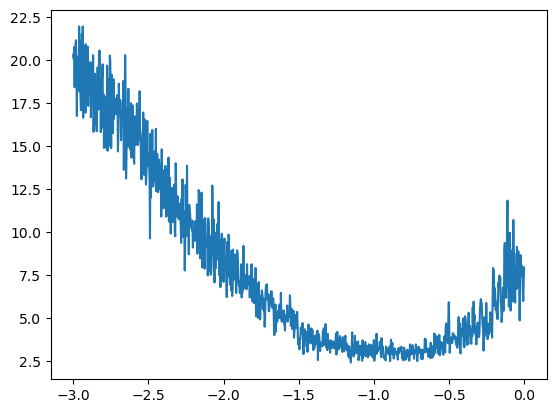

In [244]:
plt.plot(lri, lossi)

In [295]:
g = torch.Generator().manual_seed(2147383647)
C = torch.randn([27, 2], generator=g)

W1 = torch.randn([6, 100], generator=g)
b1 = torch.randn(100, generator=g)

W2 = torch.randn([100, 27], generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [296]:
for p in parameters:
    p.requires_grad = True

In [311]:
for i in range(10000):
    # minibatch creation
    batch_ix = torch.randint(0, X.shape[0], size=(32,))
    
    # forward pass
    emb = C[X[batch_ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[batch_ix])
    
    # backwardpass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # lr = lrs[i]
    # updating parameters
    for p in parameters:
        p.data += -0.001 * p.grad

emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)

print(loss.item())

2.3859121799468994


## build 3 split dataset

In [3]:
def build_dataset(words):
    block_size = 3
    X, Y = [], []

    for w in words:
        # print(w)
        context = [0] * block_size
        
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context), '----->', itos[ix])
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)

n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [4]:
g = torch.Generator().manual_seed(2147383647)
C = torch.randn([27, 2], generator=g)

W1 = torch.randn([6, 100], generator=g)
b1 = torch.randn(100, generator=g)

W2 = torch.randn([100, 27], generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

In [5]:
for i in range(30000):
    # minibatch creation
    batch_ix = torch.randint(0, Xtr.shape[0], size=(32,))
    
    # forward pass
    emb = C[Xtr[batch_ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[batch_ix])
    
    # backwardpass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # lr = lrs[i]
    # updating parameters
    for p in parameters:
        p.data += -0.01 * p.grad

print(loss.item())

2.500889301300049


In [6]:
## loss on training set
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
print("loss on training set: ", loss.item())

## Test on dev
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
print("loss on dev set: ", loss.item())

loss on training set:  2.460137128829956
loss on dev set:  2.4471871852874756


### Scaling the Model:
Because we are observing that our model has a very similar performance for training dataset and dev dataset.
This means that the model is not big enough to overfit on the training set.

In [14]:
g = torch.Generator().manual_seed(2147383647)
C = torch.randn([27, 2], generator=g)

W1 = torch.randn([6, 300], generator=g)
b1 = torch.randn(300, generator=g)

W2 = torch.randn([300, 27], generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

2.4458916187286377


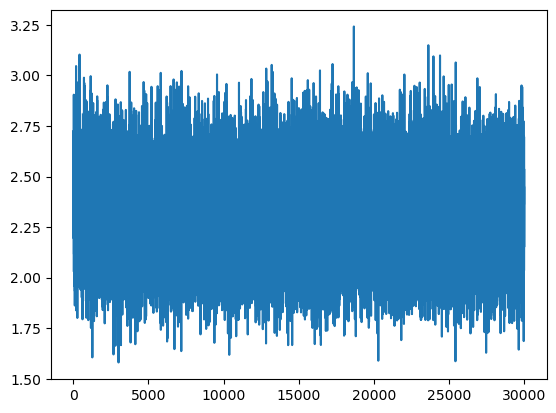

In [24]:
stepi = []
lossi = []

for i in range(30000):
    # minibatch creation
    batch_ix = torch.randint(0, Xtr.shape[0], size=(32,))
    
    # forward pass
    emb = C[Xtr[batch_ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[batch_ix])
    
    # backwardpass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    lr = 0.01
    # updating parameters
    for p in parameters:
        p.data += -lr * p.grad
    
    stepi.append(i)
    lossi.append(loss.item())

print(loss.item())
plt.plot(stepi, lossi)

In [25]:
## loss on training set
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
print("loss on training set: ", loss.item())

## Test on dev
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
print("loss on dev set: ", loss.item())

loss on training set:  2.2949609756469727
loss on dev set:  2.2949936389923096


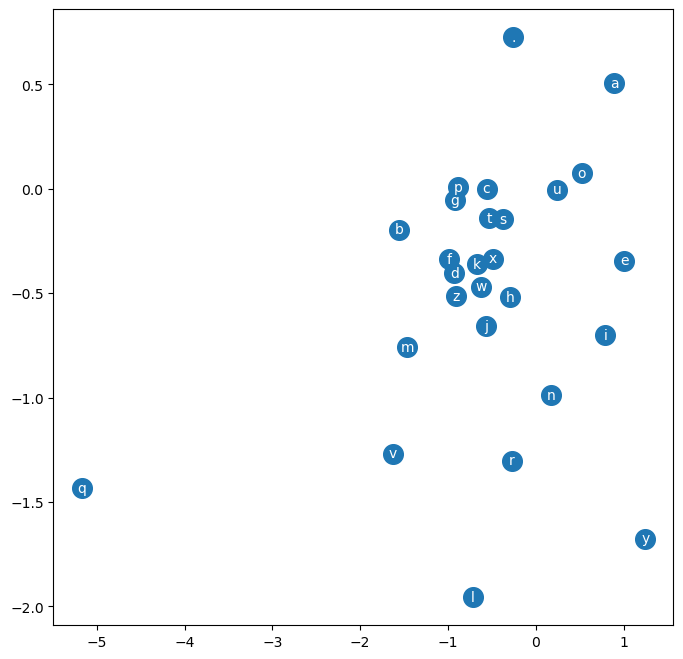

In [27]:
plt.figure(figsize=(8,8))
plt.scatter(C[:, 0].data, C[:, 1].data, s = 200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i, 1].item(), itos[i], ha='center', va='center', color='white')
plt.show()

### Scaling the embedding

In [39]:
g = torch.Generator().manual_seed(2147383647)
C = torch.randn([27, 10], generator=g)

W1 = torch.randn([30, 200], generator=g)
b1 = torch.randn(200, generator=g)

W2 = torch.randn([200, 27], generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

stepi = []
lossi = []

2.5985774993896484


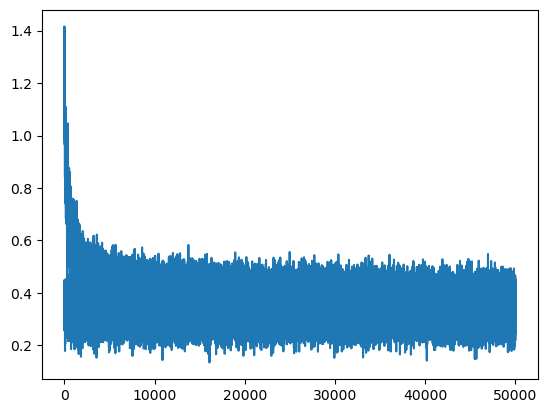

In [46]:
for i in range(50000):
    # minibatch creation
    batch_ix = torch.randint(0, Xtr.shape[0], size=(32,))
    
    # forward pass
    emb = C[Xtr[batch_ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[batch_ix])
    
    # backwardpass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    lr = 0.01
    # updating parameters
    for p in parameters:
        p.data += -lr * p.grad
    
    stepi.append(i)
    lossi.append(loss.log10().item())

print(loss.item())
plt.plot(stepi, lossi)

In [50]:
## loss on training set
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
print("loss on training set: ", loss.item())

## Test on dev
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
print("loss on dev set: ", loss.item())

loss on training set:  2.175445795059204
loss on dev set:  2.2012946605682373


### Sampling of the model

In [51]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(10):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    
    print(''.join(itos[i] for i in out))

mora.
kayah.
keel.
nichyla.
remmanieks.
legraderedielin.
shi.
jenleigh.
estana.
avayzion.
